# Final version of all the calculators is in week1.py

In [43]:
# Week 1

from math import log2
import numpy as np
import matplotlib.pyplot as plt
from contextlib import suppress

def infocontent(p):
    return - log2(p)

def entropy(p: np.array):

    if type(p) == list:
        p = np.array(p)

    # if np.sum(p) != 1:
    if not isclose(np.sum(p), 1, rel_tol=1e-6):
        raise Exception('The sum of the elements of p should be = 1: {}'.format(p))

    with np.errstate(divide='ignore'):
        H = - np.dot(p, np.where(p > 0, np.log2(p), 0))

    return  H

In [44]:
infocontent(1/24)

4.584962500721156

In [45]:
# Calculate entropy of a sequence of stuff

import collections
 
from scipy.stats import entropy
  
def calculateDatasetShannonEntropy(items):
    itemscount = collections.Counter(items)
    
    # probability = # item x / # total number of items
    dist = [x/sum(itemscount.values()) for x in itemscount.values()]
 
    # use scipy to calculate entropy
    entropy_value = entropy(dist, base=2)
 
    return entropy_value

In [46]:
def jointentropy(p: np.array):
    print(type(p))
    print(p.shape[0])
    print(p.shape[1])
    if type(p) == list:
        p = np.array(p)
    if p.shape[0] != p.shape[1]:
        raise Exception("p must be a square matrix")
    print("np.sum(p, axis=0) != 1 :", np.sum(p, axis=0) != 1)
    print("np.sum(p, axis=0):", np.sum(p, axis=0))
    if ( np.sum(p, axis=0) != 1).any() or (np.sum(p, axis=1) != 1).any():
        raise Exception('The sum of the elements of p should be = 1 in all dimensions {}'.format(p))
    with suppress(ZeroDivisionError):
        H = - np.dot(p, np.where(p > 0, np.log2(p), 0))
        H = np.sum(H)

    return  H

In [47]:
a = np.array([[0.1, 0.9], [0.9, 0.1]])
print(a.shape)
je=jointentropy(a)
print("Joint entropy ", je)

(2, 2)
<class 'numpy.ndarray'>
2
2
np.sum(p, axis=0) != 1 : [False False]
np.sum(p, axis=0): [1. 1.]
Joint entropy  6.947862376664824


In [48]:
print("Join entropy with scipy:",  entropy(a.ravel(), base=2))
#entropy(p.ravel(), base=2)

Join entropy with scipy: 1.4689955935892813


In [49]:
entropy(np.array([0.1, 0.9]))

0.3250829733914482

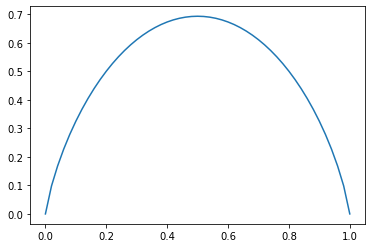

In [50]:
# Plot H(X) as a function of p(x=1) for binary X

x1=np.linspace(0, 1, num=51)
x2 = 1 - x1
x2


x = np.array(list(zip(x1,x2)))
x

plt.plot(x1, [ entropy(xi) for xi in x])

In [51]:
# test entropy
entropy([0.25, 0.25, 0.25, 0.25])

1.3862943611198906

In [52]:
# 5. Coming back to the characters that we could play Guess Who? with on the Kooky characters sheet 
# (Links to an external site.), validate that (using your entropy function if you need to)

# (1) H(who) entropy of the characters identity - Question: who is your character? 
entropy([1/24 for i in range(24)])

3.1780538303479453

In [53]:
# (2) H(one eye question) - Question : Does your character has one eye
entropy([5/24, 19/24])

0.5117400734174093

In [54]:
# (3) H(Jason question) - - Question : Is your character Jason
entropy(np.array([1/24, 23/24]))

0.1732052067491771

In [55]:
# entropy([0, 0.5, 0.5])
# https://stackoverflow.com/questions/21752989/numpy-efficiently-avoid-0s-when-taking-logmatrix
# https://www.w3schools.com/python/numpy/numpy_ufunc_logs.asp
# https://stackoverflow.com/questions/15450192/fastest-way-to-compute-entropy-in-python

p = np.array([0.1, 0.4, 0.5])
- np.dot(p, np.where(p > 0, np.log2(p), 0))

1.360964047443681

In [56]:
from scipy.stats import entropy
p = np.array([0, 0.5, 0.5])
entropy(p, base=2)

1.0

In [57]:
p = np.array([0.5, 0.5])
entropy(p, base=2)

1.0

In [58]:
p = np.array([0.2, 0.30, 0.25, 0.25])
entropy(p, base=2)

1.9854752972273346

In [59]:
# Plot H(X) as a function of p(x=1) for X with alphabet C
# P(p(x=a), p(x=b), p(x=c), p(x=d))

x=np.linspace(0, 1, num=51)
x=x.reshape(51,1)

def makexx(x):

    print("np.cumsum: ", np.cumsum(x, axis=1))
    print("np.cumsum.shape", np.cumsum(x, axis=1).shape)
    x2 = np.ones((51,1)) - np.cumsum(x, axis=1)
    print("x2.shape:", x2.shape)
    x = np.concatenate((x, x2), axis=1)
    print(x)
    print(x.shape)
    return x


In [60]:
# Plot H(X) as a function of p(x=1) for X with alphabet C
# P(p(x1=1), p(x2=2), p(x3=3), p(x4=4))

In [61]:
# Calculate entropy of a sequence of stuff

import collections
 
from scipy.stats import entropy
  
def calculateDatasetShannonEntropy(items):
    itemscount = collections.Counter(items)
    
    # probability = # item x / # total number of items
    dist = [x/sum(itemscount.values()) for x in itemscount.values()]
 
    # use scipy to calculate entropy
    entropy_value = entropy(dist, base=2)
 
    return entropy_value

calculateDatasetShannonEntropy(['hello', 'bye', 'bye'])

0.9182958340544894

In [62]:
calculateDatasetShannonEntropy(['bye', 'bye', 'bye'])

0.0

In [63]:
calculateDatasetShannonEntropy(['bye', 'hello', 'bye', 'hello'])

1.0

In [64]:
calculateDatasetShannonEntropy([1,1,1,1])

0.0

In [65]:
calculateDatasetShannonEntropy([0,1,0,1])

1.0

In [66]:
calculateDatasetShannonEntropy([0,1,1,2,2,0])

1.584962500721156

In [67]:
calculateDatasetShannonEntropy(['bye', 'hello', 'bye', 'hello'])

1.0

In [68]:
#https://stackoverflow.com/questions/51022380/how-to-calculate-entropy-of-joint-distribution

In [69]:
        import numpy as np
        p = np.array([[0.125, 0.0625, 0.03125, 0.03125],
             [0.0625, 0.125, 0.03125, 0.03125],
             [0.0625, 0.0625, 0.0625, 0.0625],
             [0.25,0,0,0]])

In [82]:
print(p)

[[0.125   0.0625  0.03125 0.03125]
 [0.0625  0.125   0.03125 0.03125]
 [0.0625  0.0625  0.0625  0.0625 ]
 [0.25    0.      0.      0.     ]]


In [71]:
dim=0
pdim = np.sum(p, axis=dim)
print(pdim)

[0.5   0.25  0.125 0.125]


In [72]:
dim=1
pdim = np.sum(p, axis=dim)
print(pdim)

[0.25 0.25 0.25 0.25]


In [73]:
def marginalP(p: np.array, dim: int):
    return np.sum(p, axis=dim)

In [74]:
marginalX = lambda  p : marginalP(p, 0)

In [75]:
marginalX(p)

array([0.5  , 0.25 , 0.125, 0.125])

In [76]:
p.shape

(4, 4)

In [77]:
p.ndim

2

In [78]:
def marginalP(p: np.array, dim: int):
    if dim + 1 > p.ndim:
        raise Exception('The probability matrix has only {} dimensions while you are requesting to get marginal in dimension {}'.format(p.ndim, dim+1))
    return np.sum(p, axis=dim)

#Note: The axis you sum along is removed from the shape. 
marginalX = lambda  p : marginalP(p, 1)

marginalY = lambda  p : marginalP(p, 0)

In [79]:
marginalP(p, 1)

array([0.25, 0.25, 0.25, 0.25])

In [83]:
from week1 import entropy, marginalX, marginalY
entropy(marginalX(p))
# 1.75 is the correct answer (7/4 bits)

2.0

In [84]:
# H(Y) = 2 bits
entropy1(marginalY(p))

1.75

In [ ]:
p.shape

In [ ]:
    for i in range(p.shape[0]):
        print(i)
        print(p)
        print(p[i])
        pyi = np.sum(p[i])
        print(pyi)

In [ ]:
def entropyXGivenY(p: np.array):
    # 2 dim only for now

    # e.g.
    # p(x,y)
    # Y rows (dim=0) \X   columns (dim=1)
    # p = np.array([[0.125, 0.0625, 0.03125, 0.03125],
    #       [0.0625, 0.125, 0.03125, 0.03125],
    #       [0.0625, 0.0625, 0.0625, 0.0625],
    #       [0.25,0,0,0]])
    # Correct answer = 11/8 = 1.375
    total = 0
    for i in range(p.shape[0]):
        pyi = np.sum(p[i])
        total+= pyi * entropy1(1/pyi * p[i])

    return total

In [ ]:
entropyXGivenY(p)

In [ ]:
11/8